In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import spline as sp
import simulation_setup as ss
import galva as ga

In [2]:
LMO = sp.Spline_params('./LMO-1C.dat')

In [3]:
capacidad, potencial, Qmax = LMO.read_iso()

In [4]:
LMO.iso_spline()

<Axes: >

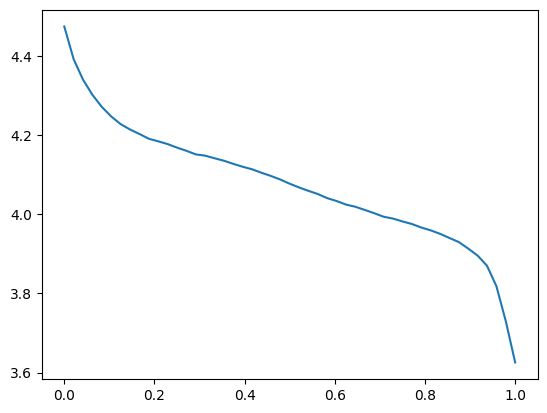

In [5]:
LMO.plot()

In [6]:
params = ss.SimulationSetup(2, #N_THREADS
                            1000,# Npx Number of space points
                            3000000,# Npt Number of time points
                            100,# NPOINT Number of points for output potential profile
                            49,# Niso Number of experimental data points
                            3.647e-13,# D Diffusion coefficient, cm2/s
                            2.9502e-9,# ks heterogeneous rate constant, cm/s
                            298.0,# T Absolute temperature, K
                            180.815,# Mr Molecular mass of the active material, g/mol
                            2.26e-3,# m Active mass, g
                            0.05e-4,# d particle diameter, cm
                            4.58,# rho Density of the active material, g.cm-3
                            0.0,# Rohm Solution resistance, ohm
                            2.0,# Xi0 Boundary value for Xi (1), log scale in base 10
                            -3.5,# Xif Boundary value for Xi (2), log scale in base 10
                            2,# NXi step for Xi, log scale in base 10
                            1.0,# L0 Boundary value for L (1), log scale in base 10
                            -4.0,# Lf Boundary value for L (2), log scale in base 10
                            2,# NL step for L, log scale in base 10
                            -0.15,# Eoff Potential cutoff, V
                            3,
                            )

In [7]:
galva = ga.galva_diagram(params, LMO, 'IBB')

In [8]:
%%time

logL, logXi, SOC = galva.galva_calc()

CPU times: user 50.5 s, sys: 6.57 ms, total: 50.5 s
Wall time: 39.7 s


In [ ]:
SOCC = []

for sss in SOC:
    if sss < 1.0:
        SOCC.append(sss)
    else:
        SOCC.append(.99999)

In [ ]:
#df = pd.DataFrame({'L': logL, 'Xi': logXi, 'Cr': Cr, 'd': d, 'SOC': SOC})
df = pd.DataFrame({'L': logL, 'Xi': logXi, 'SOC': SOC})

In [ ]:
x = df['L']
y = df['Xi']
z = df['SOC']

# Crear el gráfico de contorno
plt.figure(figsize=(8, 6))
contour_plot = plt.tricontourf(x, y, SOCC, cmap="viridis", levels=20)

# Etiquetas de ejes y título
plt.xlabel('log(L)')
plt.ylabel('log(Xi)')
plt.title('DIAGRAMA ESFERICA')

# Barra de colores
plt.colorbar(contour_plot, label='SOC')

# Mostrar el gráfico
plt.show()

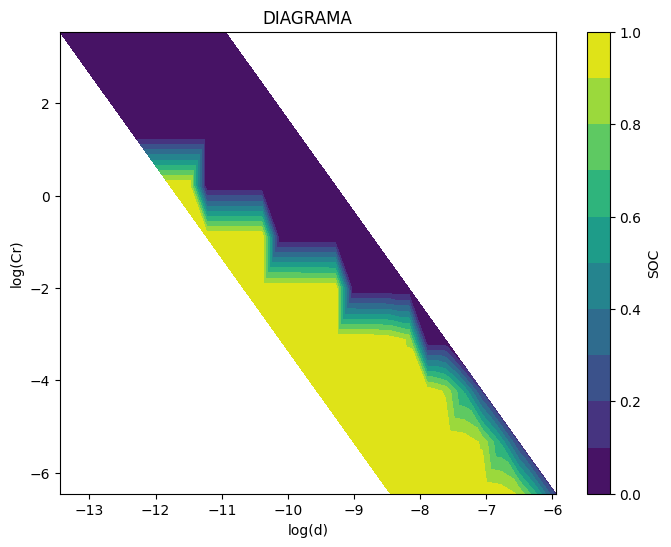

In [20]:
x = df['d']
y = df['Cr']
z = df['SOC']

# Crear el gráfico de contorno
plt.figure(figsize=(8, 6))
contour_plot = plt.tricontourf(x, y, SOCC, cmap="viridis", levels=10)

# Etiquetas de ejes y título
plt.xlabel('log(d)')
plt.ylabel('log(Cr)')
plt.title('DIAGRAMA')

# Barra de colores
plt.colorbar(contour_plot, label='SOC')

# Mostrar el gráfico
plt.show()

In [71]:
df.to_csv('esf_100x100.csv')  

# Lineal

In [7]:
li_path = '../../paralelo/diagramas/galva_lineal_chequeo.so'
geo = 3.0

In [8]:
Xi = np.linspace(Xi0, Xif, NXi)
Xi = np.power(10, Xi)
L = np.linspace(L0, Lf, NL)
L = np.power(10, L)

In [9]:
for ll in L:
    for xx in Xi:
        galva_li = gl.galva_diagram(li_path, Npx, Npt, NPOINTS, Niso, D, ks, T, Mr, m, rho, Rohm, Eoff, Qmax, geo, xx, ll, ai, bi, ci, di, capacidad)
        galva_li.galva_calc()

In [10]:
with open('Profile-Out-L-Xi.dat', 'r') as isos:
    isos = isos.readlines()

In [11]:
isos_proc = [ii.split() for ii in isos if '#' not in ii]

In [14]:
iso_L = [float(ii[0]) for ii in isos_proc]
iso_Xi = [float(ii[1]) for ii in isos_proc]
iso_SOC = [float(ii[2]) for ii in isos_proc]
iso_POT = [float(ii[3]) for ii in isos_proc]

In [16]:
isos_df = pd.DataFrame({'L':iso_L, 'Xi': iso_Xi, 'SOC':iso_SOC, 'Potencial':iso_POT})

<Axes: xlabel='SOC'>

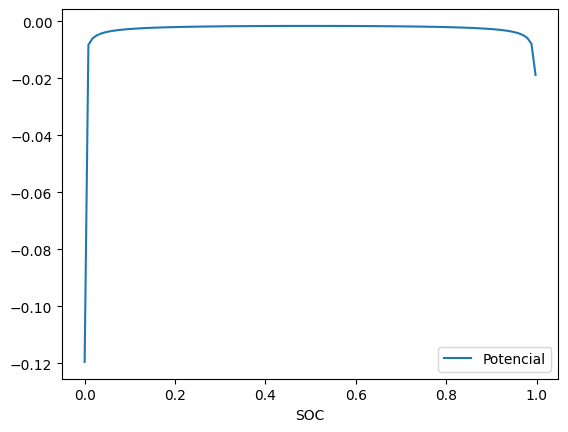

In [24]:
isos_df[(isos_df.L == L[0]) & (isos_df.Xi == Xi[0])].plot(x='SOC', y='Potencial')